In [115]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def process_clues(row_clues, col_clues):
    rccl = [[i for i in x.split('\n') if i != '']
            for x in [row_clues, col_clues]]
    grid_dims = [len(i) for i in rccl]
    poss = [[np.array(get_rc_poss(grid_dims[1-x],
                                  [int(n) for n in i.split() if n != '']))
             for i in rccl[x]]
            for x in range(2)]    
    
    return poss, grid_dims


def get_rc_poss(ncells, groups):
    rlim = ncells-sum(groups)-len(groups)+1
    if rlim >= 0:
        if len(groups) == 1:
            return [[*[-1]*i, *[1]*groups[0], *[-1]*(rlim-i)] 
                    for i in range(rlim+1)]
        else:
            return [[*[-1]*i, *[1]*groups[0], -1, *j]
                    for i in range(rlim+1)
                    for j in get_rc_poss(ncells-i-groups[0]-1, 
                                         groups[1:])]
    return []


def solve(row_clues, col_clues):
    poss, grid_dims = process_clues(row_clues, col_clues)
    grid = np.zeros(grid_dims, dtype=int)
    gtp = 0
    while True:
        for ptr in range(grid_dims[gtp]):
            poss[gtp][ptr] = poss[gtp][ptr][np.all(poss[gtp][ptr] * grid[ptr:ptr+1] >= 0, axis=1)]
            filt = np.ptp(poss[gtp][ptr], axis=0) == 0
            grid[ptr][filt] = poss[gtp][ptr][0][filt]
        if np.any(grid == 0):
            gtp ^= 1
            grid = grid.T
        else:
            break
    if gtp:
        grid = grid.T
    plt.imshow(grid, cmap='gray_r')

In [130]:
img = np.mean(mpimg.imread('../data/nonogram.jpeg'), axis=2)
img = img / np.max(img)

In [156]:
tv1 = (img[2:-2] < img[:-4]) & (img[2:-2] < img[4:])
tv2 = np.mean(tv1, axis=1)

In [164]:
img[2:-2][585:595, 550]

array([0.38562092, 0.38562092, 0.38562092, 0.38562092, 0.38562092,
       0.38431373, 0.39346405, 0.41437908, 0.0496732 , 0.39346405])

In [159]:
tv3 = np.arange(tv2.shape[0])[tv2 > 0.5]

In [168]:
tv4 = np.abs(np.expand_dims(tv3, 0) - np.expand_dims(tv3, 1)).reshape(-1)

In [170]:
np.column_stack(np.unique(tv4, return_counts=True))[:50]

array([[ 0, 53],
       [ 1, 20],
       [ 3, 12],
       [ 4, 20],
       [ 5,  6],
       [ 6,  6],
       [ 7,  6],
       [ 8,  2],
       [ 9,  4],
       [10,  4],
       [11,  2],
       [12,  2],
       [13,  2],
       [15,  2],
       [21,  2],
       [25,  2],
       [26,  2],
       [27,  2],
       [28,  2],
       [29,  4],
       [30,  2],
       [31,  4],
       [32,  4],
       [33,  8],
       [34,  8],
       [35,  4],
       [36,  8],
       [37, 34],
       [38, 30],
       [39,  6],
       [40,  8],
       [41, 12],
       [42,  8],
       [43,  4],
       [44,  6],
       [45,  4],
       [46,  4],
       [47,  4],
       [49,  2],
       [50,  2],
       [53,  2],
       [54,  2],
       [59,  2],
       [61,  2],
       [62,  2],
       [66,  6],
       [67,  8],
       [68,  4],
       [70,  4],
       [71, 12]])

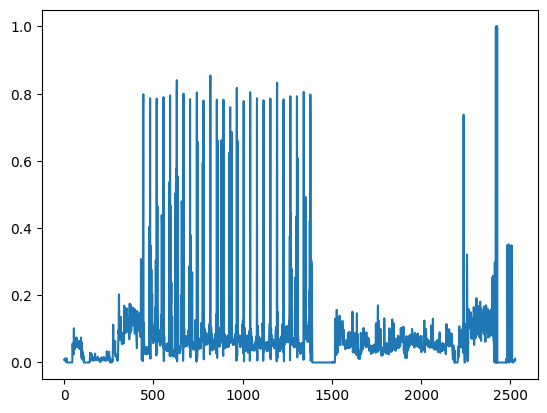

In [157]:
plt.plot(np.arange(tv2.shape[0]), tv2)
plt.show()

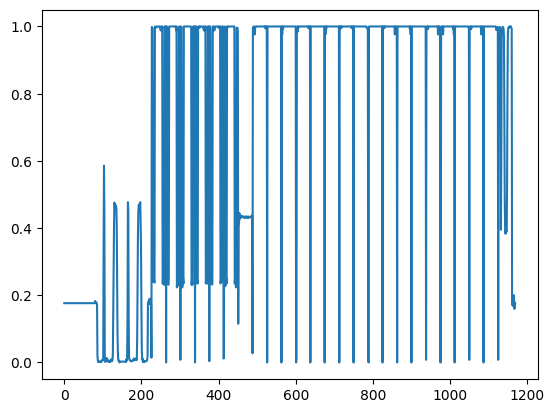

In [135]:
plt.plot(np.arange(img.shape[1]), img[1000])
plt.show()

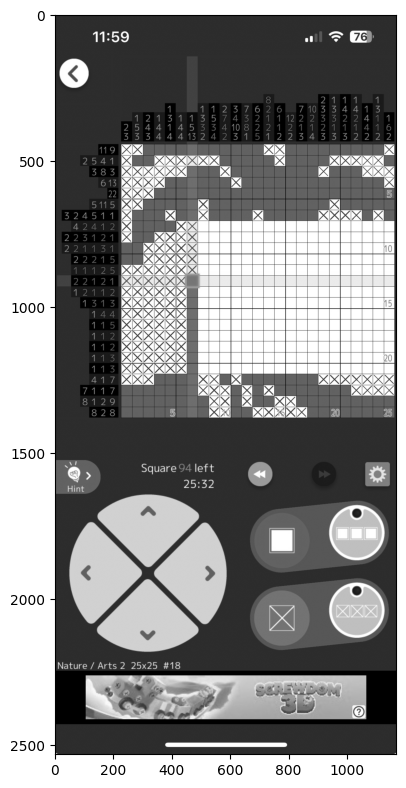

In [132]:
plt.figure(figsize=(12.8, 9.6))
plt.imshow(img, cmap='gray')

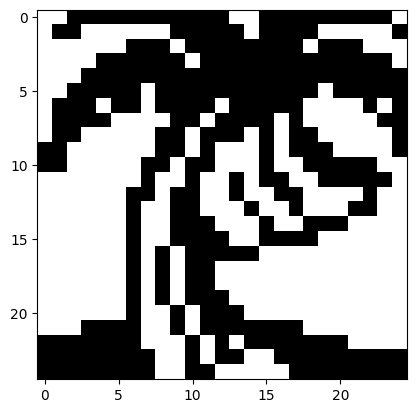

In [116]:
solve(row_clues, col_clues)

In [2]:
row_clues = """
11 9
2 5 4 1
3 8 3
6 13
22
5 11 5
3 2 4 5 1 1
4 2 4 1 2
2 2 3 1 2 1
2 2 1 1 3 1
2 2 2 1 5
1 1 1 2 5
2 2 1 2 1
1 2 1 1 2
1 3 1 3
1 4 4
1 1 5
1 1 2
1 1 2
1 1 3
1 1 3
4 1 7
7 1 1 7
8 1 2 9
8 2 8
"""

col_clues = """
2 3
1 5 3
2 4 3
1 4 4
1 3 1 4
1 4 4
1 5 13
1 3 3 2
1 5 3 4
2 7 4 2
3 4 10 3
7 3 8 1
6 2 2 5
8 2 1 2 1
6 1 1 2
12 2 2
7 2 1 3
10 2 1 4
2 3 3 2 3
1 3 3 1 3
1 4 2 1 3
1 4 2 1 2
1 4 4 2
1 3 1 1 2
1 6 2
"""